In [32]:
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import becquerel as bq
import scipy.integrate as integrate
import math as m
import importlib

In [33]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\康睿琦\\Documents\\GitHub\\radwatch-analysis\\ROI.py'>

In [34]:
#Efficiency Master
#Define inputs
source_isotopes = np.array(['K-40']); #get counts under the peak subtrack the background
source_energies = np.array([1460]);
source_activities = np.array([1]);
spectrum = r'C:\rad data\Radwatch data\UCB087_Wild_King_Salmon_3.Spe'
background = r'C:\rad data\Radwatch data\UCB096_Backgorund_2_13_17.Spe'
branching_ratio = np.array([1]);

In [35]:
#Call scripts
roi = ROI.ROI(Spectrum.from_file(spectrum), Spectrum.from_file(background), source_energies)
roi_result = roi.get_counts()

SpeFile: Reading file C:\rad data\Radwatch data\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\rad data\Radwatch data\UCB096_Backgorund_2_13_17.Spe


In [36]:
peakfit = PF.PF(spectrum,background,source_energies)
pf_result = peakfit.get_counts()
print(roi_result, pf_result)

SpeFile: Reading file C:\rad data\Radwatch data\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\rad data\Radwatch data\UCB096_Backgorund_2_13_17.Spe
([51548.5], [234.99574464232322]) [57966.79400977]


In [37]:
spec = Spectrum.from_file(spectrum)

counts = spec.counts_vals
energies = spec.energies_kev

def f_near(a,a0):
    idx = np.abs(a-a0).argmin()
    return idx

k_40_idx = f_near(energies,source_energies[0]) #？
print(k_40_idx)
print(energies[k_40_idx])

SpeFile: Reading file C:\rad data\Radwatch data\UCB087_Wild_King_Salmon_3.Spe
7987
1459.9758617672946


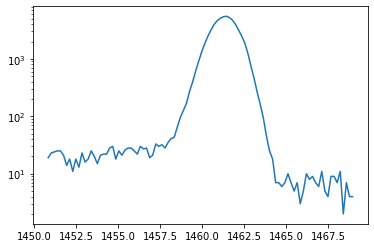

In [38]:
#testing plotting
roi_low = k_40_idx - 50
roi_high = k_40_idx + 50

#slice the counts array: select counts[starts-index:stop-index]
plot_counts = counts[roi_low:roi_high]
plot_energies = energies[roi_low:roi_high]

#print(len(counts))
#print(len(plot_counts))

plt.plot(plot_energies,plot_counts)
plt.yscale('log')


In [39]:
roi.find_peak_energies()
print(roi.target_peaks)

[1461]


In [40]:
roi_low_bins,roi_peak_bins,roi_high_bins = roi.get_roi_windows(roi.target_peaks[0])
print(roi.window)
print(roi_low_bins[0])
print(roi_peak_bins[0])
print(roi_high_bins[0])

[[-2.  -1. ]
 [-0.5  0.5]
 [ 1.   2. ]]
[7938 7939 7940 7941 7942 7943 7944 7945 7946 7947 7948 7949 7950 7951
 7952 7953 7954 7955 7956 7957 7958 7959 7960 7961 7962 7963 7964 7965]
[7979 7980 7981 7982 7983 7984 7985 7986 7987 7988 7989 7990 7991 7992
 7993 7994 7995 7996 7997 7998 7999 8000 8001 8002 8003 8004 8005 8006]
[8020 8021 8022 8023 8024 8025 8026 8027 8028 8029 8030 8031 8032 8033
 8034 8035 8036 8037 8038 8039 8040 8041 8042 8043 8044 8045 8046 8047]


[  65.   96.  127.  169.  272.  398.  619.  923. 1353. 1875. 2507. 3200.
 3986. 4616. 5082. 5395. 5509. 5213. 4676. 3931. 3123. 2463. 1853. 1220.
  731.  452.  261.]


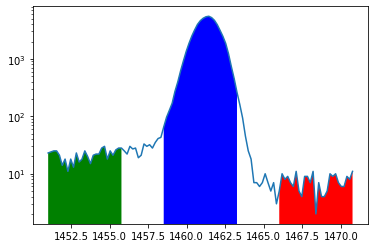

In [41]:
#the range of counts and energy of each 
rlow = roi_low_bins[0][0]
rhi = roi_high_bins[0][-1]
plot_counts = counts[rlow:rhi]
plot_energies = energies[rlow:rhi]

rlow = roi_low_bins[0][0]
rhi = roi_low_bins[0][-1]
low_counts = counts[rlow:rhi]
low_energies = energies[rlow:rhi]

rlow = roi_high_bins[0][0]
rhi = roi_high_bins[0][-1]
high_counts = counts[rlow:rhi]
high_energies = energies[rlow:rhi]

rlow = roi_peak_bins[0][0]
rhi = roi_peak_bins[0][-1]
peak_counts = counts[rlow:rhi]
peak_energies = energies[rlow:rhi]

fig,ax = plt.subplots()
ax.plot(plot_energies,plot_counts)
print(peak_counts)
ax.fill_between(low_energies,0,low_counts,facecolor = 'green',interpolate=True)
ax.fill_between(high_energies,0,high_counts,facecolor = 'red',interpolate=True)
ax.fill_between(peak_energies,0,peak_counts,facecolor = 'blue',interpolate=True)
ax.set_yscale('log')

In [42]:
idx = (energies > 1460+roi.window[1,0]*roi.delta_E)*(energies < 1460+roi.window[1,1]*roi.delta_E)
bins = np.where(idx)
counts[bins]
local_idx = np.argmax(counts[bins])
index = bins[0][0] + local_idx
energies[index]

1461.438205179703

In [43]:
#spec counting
tot_peak_counts = np.sum(peak_counts)
sigma_sample_gross = m.sqrt(tot_peak_counts)
tot_spechigh = np.sum(high_counts)
tot_speclow = np.sum(low_counts)
sigma_ROIspec = m.sqrt(tot_spechigh + tot_speclow)/2
print(tot_peak_counts)

#bg counting
bg = Spectrum.from_file(background)
counts = bg.counts_vals
energies = bg.energies_kev

bg_low_bins,bg_peak_bins,bg_high_bins = roi.get_roi_windows(roi.target_peaks[0])

bglow = bg_low_bins[0][0]
bghi = bg_low_bins[0][-1]
low_counts = counts[bglow:bghi]

bglow = bg_high_bins[0][0]
bghi = bg_high_bins[0][-1]
high_counts = counts[bglow:bghi]

bglow = bg_peak_bins[0][0]
bghi = bg_peak_bins[0][-1]
peak_counts = counts[bglow:bghi]

tot_bg_peak = np.sum(peak_counts)
tot_bghigh = np.sum(high_counts)
tot_bglow = np.sum(low_counts)
sigma_bg_gross = m.sqrt(tot_bg_peak)
sigma_ROIbg = m.sqrt(tot_bghigh + tot_bglow)/2

60115.0
SpeFile: Reading file C:\rad data\Radwatch data\UCB096_Backgorund_2_13_17.Spe


In [44]:
#uncertainties 1
net_Rhi = tot_spechigh - tot_bghigh
s_net_Rhi = m.sqrt(tot_spechigh + tot_bghigh)
net_Rlow = tot_speclow - tot_bglow
s_net_Rlow = m.sqrt(tot_speclow + tot_bglow)
net_ROI = (net_Rhi + net_Rlow)/2
s_ROI = 0.5 * m.sqrt(s_net_Rhi**2 + s_net_Rlow**2)
uncer = m.sqrt(sigma_sample_gross**2  + sigma_bg_gross**2 + s_ROI**2)
print(uncer)

247.33580412063273


In [45]:
#uncertainties 2
uncer = m.sqrt(sigma_sample_gross**2 + sigma_ROIspec**2 + sigma_bg_gross**2 + sigma_ROIbg**2)
print(uncer)

247.33580412063273
